<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/2019%20Fastai%20Deep%20Learning/2019_Deep_Learning_5_SGD_Embedding_WeightDecay_Optimization_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Video](https://youtu.be/uQtTwhpv7Ew) / [Lesson Forum](https://forums.fast.ai/t/lesson-5-official-resources-and-updates/30863)

Welcome everybody to lesson 5. And so we have officially peaked, and everything is down hill here from here as of halfway through the last lesson.

We started with computer vision because it's the most mature out-of-the-box ready to use deep learning application. It's something which if you're not using deep learning, you won't be getting good results. So the difference, hopefully, between not during lesson one versus doing lesson one, you've gained a new capability you didn't have before. And you kind of get to see a lot of the tradecraft of training and effective neural net.

So then we moved into NLP because text is another one which you really can't do really well without deep learning generally speaking. It's just got to the point where it works pretty well now. In fact, the New York Times just featured an article about the latest advances in deep learning for text yesterday and talked quite a lot about the work that we've done in that area along with Open AI, Google, and Allen Institute of artificial intelligence.

Then we've kind of finished our application journey with tabula and collaborative filtering, partly because tabular and collaborative filtering are things that you can still do pretty well without deep learning. So it's not such a big step. It's not a whole new thing that you could do that you couldn't used to do. And also because we're going to try to get to a point where we understand pretty much every line of code and the implementations of these things, and the implementations of those things is much less intricate than vision and NLP. So as we come down this other side of the journey which is all the stuff we've just done, how does it actually work by starting where we just ended which is starting with collaborative filtering and then tabular data. We're going to be able to see what all those lines of code do by the end of today's lesson. That's our goal.

Particularly this lesson, you should not expect to come away knowing how to do applications you couldn't do before. But instead, you should have a better understanding of how we've actually been solving the applications we've seen so far. **Particularly we're going to understand a lot more about regularization which is how we go about managing over versus under fitting. So hopefully you can use some of the tools from this lesson to go back to your previous projects and get a little bit more performance, or handle models where previously maybe you felt like your data was not enough, or maybe you were underfitting and so forth**. It's also going to lay the groundwork for understanding convolutional neural networks and recurrent neural networks that we will do deep dives into in the next two lessons. As we do that, we're also going to look at some new applications﹣two new vision and NLP applications.

#Review of last week [3:32](https://youtu.be/uQtTwhpv7Ew?t=212)

Let's start where we left off last week. Do you remember this picture?

![](https://github.com/hiromis/notes/blob/master/lesson4/18.png?raw=true)

We were looking at what does a deep neural net look like, and we had various layers. The first thing we pointed out is that there are only and exactly two types of layer. There are layers that contain parameters, and there are layers that contain activations. 

- Parameters are the things that your model learns. They're the things that you use gradient descent to go **`parameters ﹣= learning rate * parameters.grad`**. That's what we do. And those parameters are used by multiplying them by input activations doing a matrix product.

- So the yellow things are our weight matrices, your weight tensors, more generally, but that's close enough. We take some input activations or some layer activations and we multiply it by weight matrix to get a bunch of activations. So activations are numbers but these are numbers that are calculated. 

I find in our study group, I keep getting questions about where does that number come from. And I always answer it in the same way. "You tell me. Is it a parameter or is it an activation? Because it's one of those two things." That's where numbers come from. I guess input is a kind of a special activation. They're not calculated. They're just there, so maybe that's a special case. So maybe it's an input, a parameter, or an activation.

**Activations don't only come out of matrix multiplications, they also come out of activation functions**. And the most important thing to remember about an activation function is that it's an element-wise function. So it's a function that is applied to each element of the input, activations in turn, and creates one activation for each input element. So if it starts with a 20 long vector it creates a 20 long vector. **By looking at each one of those in turn, doing one thing to it, and spitting out the answer. So an element-wise function**. ReLU is the main one we've looked at, and honestly it doesn't too much matter which you pick. So we don't spend much time talking about activation functions because if you just use ReLU, you'll get a pretty good answer pretty much all the time.

Then we learnt that this combination of matrix multiplications followed by ReLUs stack together has this amazing mathematical property called the universal approximation theorem. If you have big enough weight matrices and enough of them, it can solve any arbitrarily complex mathematical function to any arbitrarily high level of accuracy (assuming that you can train the parameters, both in terms of time and data availability and so forth). That's the bit which I find particularly more advanced computer scientists get really confused about. They're always asking where's the next bit? What's the trick? How does it work? But that's it. You just do those things, and you pass back the gradients, and you update the weights with the learning rate, and that's it.

So that piece where we take the loss function between the actual targets and the output of the final layer (i.e. the final activations), we calculate the gradients with respect to all of these yellow things, and then we update those yellow things by subtracting learning rate times the gradient. That process of calculating those gradients and then subtracting like that is called back propagation. So when you hear the term **back propagation**, it's one of these terms that neural networking folks love to use﹣it sounds very impressive but you can replace it in your head with **`weights ﹣= weight.grad * learning rate`** or parameters, I should say, rather than weights (a bit more general). So that's what we covered last week. Then I mentioned last week that we're going to cover a couple more things. I'm going to come back to these ones "cross-entropy" and "softmax" later today.



##Fine tuning [8:45](https://youtu.be/uQtTwhpv7Ew?t=525)

Let's talk about fine-tuning. So what happens when we take a ResNet 34 and we do transfer learning? What's actually going on? The first thing to notice is the ResNet34 we grabbed from ImageNet has a very specific weight matrix at the end. It's a weight matrix that has 1000 columns:

![](https://github.com/hiromis/notes/raw/master/lesson5/1.png?raw=true)

Why is that? Because the problem they asked you to solve in the ImageNet competition is please figure out which one of these 1000 image categories this picture is. So that's why they need a 1000 things here because in ImageNet, this target vector is length 1000. You've got to pick the probability that it's which one of those thousand things.

**There's a couple of reasons this weight matrix is no good to you when you're doing transfer learning**. 
- The first is that you probably don't have a thousand categories. I was trying to do teddy bears, black bears, or brown bears. So I don't want a thousand categories. 
- The second is even if I did have exactly a thousand categories, they're not the same thousand categories that are in ImageNet. So basically this whole weight matrix is a waste of time for me. 

So what do we do? We throw it away. When you go **cnn_learner** in fastai, it deletes that. And what does it do instead? Instead, it puts in two new weight matrices in there for you with a ReLU in between.

![](https://github.com/hiromis/notes/raw/master/lesson5/2.png?raw=true)

There are some defaults as to what size this first one is, but the second one the size there is as big as you need it to be. So in your data bunch which you passed to your learner, from that we know how many activations you need. If you're doing classification, it's how many ever classes you have, if you're doing regression it's how many ever numbers you're trying to predict in the regression problem. So remember, if your data bunch is called **data** that'll be called **data.c**. So we'll add for you this weight matrix of size **data.c** by however much was in the previous layer.

[11:08](https://youtu.be/uQtTwhpv7Ew?t=668)

**Okay so now we need to train those because initially these weight matrices are full of random numbers**. Because new weight matrices are always full of random numbers if they are new. And these ones are new. We're just we've grabbed them and thrown them in there, so we need to train them. But the other layers are not new. The other layers are good at something. What are they good at? Let's remember that [Zeiler and Fergus paper](https://arxiv.org/pdf/1311.2901.pdf). Here are examples of some visualization of some filters some some weight matrices in the first layer and some examples of some things that they found.

![](https://github.com/hiromis/notes/blob/master/lesson5/3.png?raw=true)

So the first layer had one part of the weight matrix was good at finding diagonal edges in this direction.

![](https://github.com/hiromis/notes/blob/master/lesson5/4.png?raw=true)

And then in layer 2, one of the filters was good at finding corners in the top left.

![](https://github.com/hiromis/notes/raw/master/lesson5/5.png?raw=true)

Then in layer 3 one of the filters was good at finding repeating patterns, another one was good at finding round orange things, another one was good at finding kind of like hairy or floral textures.

So as we go up, they're becoming more sophisticated, but also more specific. So like layer 4, I think, was finding like eyeballs, for instance. Now if you're wanting to transfer and learn to something for histopathology slides, there's probably going to be no eyeballs in that, right? So the later layers are no good for you. But there'll certainly be some repeating patterns and diagonal edges. So the earlier you go in the model, the more likely it is that you want those weights to stay as they are.



##Freezing layers [13:00](https://youtu.be/uQtTwhpv7Ew?t=780)

To start with, we definitely need to train these new weights because they're random. So let's not bother training any of the other weights at all to start with. So what we do is we basically say let's freeze.

![](https://github.com/hiromis/notes/blob/master/lesson5/6.png?raw=true)

Let's freeze all of those other layers. So what does that mean? All that means is that we're asking fastai and PyTorch that when we train (however many epochs we do), when we call fit, don't back propagate the gradients back into those layers. In other words, when you go **`parameters=parameters - learning rate * gradient`**, only do it for the new layers, don't bother doing it for the other layers, That's what freezing means - just means don't update those parameters.

So it'll be a little bit faster as well because there's a few less calculations to do. It'll take up a little bit less memory because there's a few less gradients that we have to store. But most importantly it's not going to change weights that are already better than nothing - they're better than random at the very least.

So that's what happens when you call freeze. It doesn't freeze the whole thing. It freezes everything except the randomly generated added layers that we put on for you.



###Unfreezing and Using Discriminative Learning Rates

Then what happens next? After a while we say "okay this is looking pretty good. We probably should train the rest of the network now". So we unfreeze. Now we're gonna chain the whole thing, but we still have a pretty good sense that these new layers we added to the end probably need more training, and these ones right at the start (e.g. diagonal edges) probably don't need much training at all. So we split our our model into a few sections. And we say "let's give different parts of the model different learning rates." So the earlier part of the model, we might give a learning rate of 1e- 5, and the later part of the model we might give a learning rate of 1e-3, for example.

So what's gonna happen now is that we can keep training the entire network. **But because the learning rate for the early layers is smaller, it's going to move them around less because we think they're already pretty good and also if it's already pretty good to the optimal value, if you used a higher learning rate, it could kick it out - it could actually make it worse which we really don't want to happen**. So this this process is called using **discriminative learning rates**. You won't find much online about it because I think we were kind of the first to use it for this purpose (or at least talked about it extensively. Maybe other probably other people used it without writing it down). So most of the stuff you'll find about this will be fastai students. But it's starting to get more well-known slowly now. It's a really really important concept. For transfer learning, without using this, you just can't get nearly as good results.

How do we do discriminative learning rates in fastai? Anywhere you can put a learning rate in fastai such as with the fit function. The first thing you put in is the number of epochs and then the second thing you put in is learning rate (the same if you use fit_one_cycle). The learning rate, you can put a number of things there:

- You can put a single number (e.g. 1e-3): Every layer gets the same learning rate. So you're not using discriminative learning rates.
- You can write a slice. So you can write slice with a single number (e.g. slice(1e-3)): The final layers get a learning rate of whatever you wrote down (1e-3), and then all the other layers get the same learning rate which is that divided by 3. So all of the other layers will be 1e-3/3. The last layers will be 1e-3.
- You can write slice with two numbers (e.g. slice(1e-5, 1e-3)). The final layers (these randomly added layers) will still be again 1e-3. The first layers will get 1e-5, and the other layers will get learning rates that are equally spread between those two - so multiplicatively equal. If there were three layers, there would be 1e-5, 1e-4, 1e-3, so equal multiples each time.

By default (at least with a CNN), you'll get three layer groups. If you say slice(1e-5, 1e-3), you will get 1e-5 learning rate for the first layer group, 1e-4 for the second, 1e-3 for the third. So now if you go back and look at the way that we're training, hopefully you'll see that this makes a lot of sense.

This divided by three thing, it's a little weird and we won't talk about why that is until part two of the course. It's a specific quirk around batch normalization. So we can discuss that in the advanced topic if anybody's interested.

That is fine tuning. Hopefully that makes that a little bit less mysterious.

#Review collaborative filtering 

[19:49](https://youtu.be/uQtTwhpv7Ew?t=1189)

So we were looking at collaborative filtering last week.

![](https://github.com/hiromis/notes/blob/master/lesson5/7.png?raw=true)

##Affine Function [20:24](https://youtu.be/uQtTwhpv7Ew?t=1224)

I'm going to introduce another piece of jargon here. They're not always exactly matrix multiplications. There's something very similar. They're linear functions that we add together, but the more general term for these things that are more general than matrix multiplications is **affine functions**. So if you hear me say the word affine function, you can replace it in your head with matrix multiplication. **But as we'll see when we do convolutions, convolutions are matrix multiplications where some of the weights are tied. So it would be slightly more accurate to call them affine functions**. And I'd like to introduce a little bit more jargon in each lesson so that when you read books or papers or watch other courses or read documentation, there will be more of the words you recognize. So when you see affine function, it just means a linear function. It means something very very close to matrix multiplication. And matrix multiplication is the most common kind of affine function, at least in deep learning.

Specifically for collaborative filtering, the model we were using was this one:

![](https://github.com/hiromis/notes/blob/master/lesson4/13.png?raw=true)

It was where we had a bunch of numbers here (left) and a bunch of numbers here (top), and we took the dot product of them. And given that one here is a row and one is a column, that's the same as a matrix product. So MMULT in Excel multiplies matrices, so here's the matrix product of those two.

I started this training last week by using solver in Exce,l and we never actually went back to see how it went. So let's go and have a look now. The average sum of squared error got down to 0.39. We're trying to predict something on a scale of 0.5 to 5, so on average we're being wrong by about 0.4. That's pretty good. And you can kind of see it's pretty good, if you look at like 3, 5, 1 is what it meant to be, 3.23, 5.1, 0.98 - that's pretty close. So you get the general idea.



##Embedding [22:51](https://youtu.be/uQtTwhpv7Ew?t=1371)

Then I started to talk about this idea of embedding matrices. In order to understand that, let's put this worksheet aside and look at [another worksheet](https://github.com/fastai/course-v3/blob/master/files/xl/collab_filter.xlsx) ("movielens_1hot" tab).

![](https://github.com/hiromis/notes/raw/master/lesson5/8.png?raw=true)

Here's another worksheet. What I've done here is I have copied over those two weight matrices from the previous worksheet. Here's the one for users, and here's the one for movies. And the movies one I've transposed it, so it's now got exactly the same dimensions as the users one.

So here are two weight matrices (in orange). Initially they were random. We can train them with gradient descent. In the original data, the user IDs and movie IDs were numbers like these. To make life more convenient, I've converted them to numbers from 1 to 15 (user_idx and movie_idx). So in these columns, for every rating, I've got user ID movie ID rating using these mapped numbers so that they're contiguous starting at one.

Now I'm going to replace user ID number 1 with this vector - the vector contains a 1 followed by 14 zeros. Then user number 2, I'm going to replace with a vector of 0 and then 1 and then 13 zeros. So movie ID 14, I've also replaced with another vector which is 13 zeros and then a 1 and then a 0. These are called one-hot encodings, by the way. This is not part of a neural net. This is just like some input pre-processing where I'm literally making this my new input:

![](https://github.com/hiromis/notes/blob/master/lesson5/9.png?raw=true)

So this is my new inputs for my movies, this is my new inputs for my users. These are the inputs to a neural net.

What I'm going to do now is I'm going to take this input matrix and I'm going to do a matrix multiplied by the weight matrix. That'll work because weight matrix has 15 rows, and this (one-hot encoding) has 15 columns. I can multiply those two matrices together because they match. You can do matrix multiplication in Excel using the MMULT function. Just be careful if you're using Excel. Because this is a function that returns multiple numbers, you can't just hit enter when you finish with it; you have to hit ctrl+shift+enter. ctrl+shift+enter means this is an array function - something that returns multiple values.

Here (User activations) is the matrix product of this input matrix of inputs, and this parameter matrix or weight matrix. So that's just a normal neural network layer. It's just a regular matrix multiply. So we can do the same thing for movies, and so here's the matrix multiply for movies.

Well, here's the thing. This input, we claim, is this one hot encoded version of user ID number 1, and these activations are the activations for user ID number one. Why is that? Because if you think about it, the matrix multiplication between a one hot encoded vector and some matrix is actually going to find the Nth row of that matrix when the one is in position N. So what we've done here is we've actually got a matrix multiply that is creating these output activations. But it's doing it in a very interesting way - it's effectively finding a particular row in the input matrix.

Having done that, we can then multiply those two sets together (just a dot product), and we can then find the loss squared, and then we can find the average loss.

![](https://github.com/hiromis/notes/raw/master/lesson5/10.png?raw=true)

And lo and behold, that number 0.39 is the same as this number (from the solver) because they're doing the same thing.

![](https://github.com/hiromis/notes/raw/master/lesson5/11.png?raw=true)

This one ("dotprod" version) was finding this particular users embedding vector, this one ("movielens_1hot" version) is just doing a matrix multiply, and therefore we know **they are mathematically identical**.

**Embedding once over** [27:57](https://youtu.be/uQtTwhpv7Ew?t=1677)

So let's lay that out again. Here's our final version (recommend watching a video for this section):

![](https://github.com/hiromis/notes/blob/master/lesson5/embedding.gif?raw=true)

This is the same weight matrices again - exactly the same I've copied them over. And here's those user IDs and movie IDs again. But this time, I've laid them out just in a normal tabular form just like you would expect to seein the input to your model. And this time, I have got exactly the same set of activations here (user embedding) that I had in movielens_1hot. But in this case I've calculated these activations using Excels OFFSET function which is an array look up. This version (movielens_emb) is identical to movielens_1hot version, but obviously it's much less memory intensive and much faster because I don't actually create the one hot encoded matrix and I don't actually do a matrix multiply. That matrix multiply is nearly all multiplying by zero which is a total waste of time.

So in other words, multiplying by a one hot encoded matrix is identical to doing an array lookup. **Therefore we should always do the array lookup version, and therefore we have a specific way of saying I want to do a matrix multiplication by a one hot encoded matrix without ever actually creating it**. I'm just instead going to pass in a bunch of integers and pretend they're one not encoded. And that is called an **embedding**.

You might have heard this word "embedding" all over the places as if it's some magic advanced mathy thing, but embedding means look something up in an array. But it's interesting to know that looking something up in an array is mathematically identical to doing a matrix product by a one hot encoded matrix. And therefore, an embedding fits very nicely in our standard model of our neural networks work.

Now suddenly it's as if we have another whole kind of layer. It's a kind of layer where we get to look things up in an array. But we actually didn't do anything special. We just added this computational shortcut - this thing called an embedding which is simply a fast memory efficient way of multiplying by hot encoded matrix.

So this is really important. Because when you hear people say embedding, you need to replace it in your head with "an array lookup" which we know is mathematically identical to matrix multiply by a one hot encoded matrix.

Here's the thing though, it has kind of interesting semantics. Because when you do multiply something by a one hot encoded matrix, you get this nice feature where the rows of your weight matrix, the values only appear (for row number one, for example) where you get user ID number one in your inputs. So in other words you kind of end up with this weight matrix where certain rows of weights correspond to certain values of your input. And that's pretty interesting. It's particularly interesting here because (going back to a kind of most convenient way to look at this) because the only way that we can calculate an output activation is by doing a dot product of these two input vectors. That means that they kind of have to correspond with each other. There has to be some way of saying if this number for a user is high and this number for a movie is high, then the user will like the movie. So the only way that can possibly make sense is if these **numbers represent features of personal taste and corresponding features of movies**. For example, the movie has John Travolta in it and user ID likes John Travolta, then you'll like this movie.

We're not actually deciding the rows mean anything. We're not doing anything to make the rows mean anything. But the only way that this gradient descent could possibly come up with a good answer is if it figures out what the aspects of movie taste are and the corresponding features of movies are. So those underlying kind of features that appear that are called **latent factors** or **latent features**. They're these hidden things that were there all along, and once we train this neural net, they suddenly appear.

##Bias [33:08](https://youtu.be/uQtTwhpv7Ew?t=1988)

Now here's the problem. No one's going to like Battlefield Earth. It's not a good movie even though it has John Travolta in it. So how are we going to deal with that? Because there's this feature called I like John Travolta movies, and this feature called this movie has John Travolta, and so this is now like you're gonna like the movie. But we need to save some way to say "unless it's Battlefield Earth" or "you're a Scientologist" - either one. So how do we do that? We need to add in **bias**.

![](https://github.com/hiromis/notes/raw/master/lesson5/12.png?raw=true)

Here is the same thing again, the same construct, same shape of everything. But this time you've got an extra row. So now this is not just the matrix product of that and that, but I'm also adding on this number and this number. Which means, now each movie can have an overall "this is a great movie" versus "this isn't a great movie" and every user can have an overall "this user rates movies highly" or "this user doesn't rate movies highly" - that's called the bias. So this is hopefully going to look very familiar. This is the same usual linear model concept or linear layer concept from a neural net that you have a matrix product and a bias.

And remember from lesson 2 SGD notebook, you never actually need a bias. You could always just add a column of ones to your input data and then that gives you bias for free, but that's pretty inefficient. So in practice, all neural networks library explicitly have a concept of bias. We don't actually add the column of ones.

So what does that do? Well just before I came in today, I ran data solver on this as well, and we can check the RMSE. So the root mean squared here is 0.32 versus the version without bias was 0.39. So you can see that this slightly better model gives us a better result. And it's better because it's giving both more flexibility and it also just makes sense semantically that you need to be able to say whether I'd like the movie is not just about the combination of what actors it has, whether it's dialogue-driven, and how much action is in it but just is it a good movie or am i somebody who rates movies highly.

So there's all the pieces of this collaborative filtering model.

**Question**: When we load a pre-trained model, can we explore the activation grids to see what they might be good at recognizing? [36:11](https://youtu.be/uQtTwhpv7Ew?t=2171)

- Yes, you can. And we will learn how to (should be) in the next lesson.

**Question**: Can we have an explanation of what the first argument in **fit_one_cycle** actually represents? Is it equivalent to an epoch?

- Yes, the first argument to fit_one_cycle or fit is number of epochs (n_epoch). In other words, an epoch is looking at every input once. If you do 10 epochs, you're looking at every input ten times. So there's a chance you might start overfitting if you've got lots of lots of parameters and a high learning rate. If you only do one epoch, it's impossible to overfit, and so that's why it's kind of useful to remember how many epochs you're doing.

**Question**: What is an affine function?

An affine function is a linear function. I don't know if we need much more detail than that. If you're multiplying things together and adding them up, it's an affine function. I'm not going to bother with the exact mathematical definition, partly because I'm a terrible mathematician and partly because it doesn't matter. But if you just remember that you're multiplying things together and then adding them up, that's the most important thing. It's linear. And therefore if you put an affine function on top of an affine function, that's just another affine function. You haven't won anything at all. That's a total waste of time. So you need to sandwich it with any kind of non-linearity pretty much works - including replacing the negatives with zeros which we call ReLU. So if you do affine, ReLU, affine, ReLU, affine, ReLU, you have a deep neural network.







#Collaborative filtering notebook [38:25](https://youtu.be/uQtTwhpv7Ew?t=2305)

Let's go back to the [collaborative filtering notebook](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson4-collab.ipynb). And this time we're going to grab the whole Movielens 100k dataset. There's also a 20 million dataset, by the way, so really a great project available made by this group called GroupLens. They actually update the Movielens datasets on a regular basis, but they helpfully provide the original one. We're going to use the original one because that means that we can compare to baselines. Because everybody basically they say, hey if you're going to compare the baselines make sure you all use the same dataset, here's the one you should use. Unfortunately it means that we're going to be restricted to movies that are before 1998. So maybe you won't have seen them all. but that's the price we pay. You can replace this with ml-latest when you download it and use it if you want to play around with movies that are up to date:

In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
os.makedirs('/root/.fastai/data/',exist_ok=True)

In [3]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

!unzip ml-100k.zip -d /root/.fastai/data/

--2019-04-30 02:09:27--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  4.84MB/s    in 1.0s    

2019-04-30 02:09:33 (4.84 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: /root/.fastai/data/ml-100k/
  inflating: /root/.fastai/data/ml-100k/allbut.pl  
  inflating: /root/.fastai/data/ml-100k/mku.sh  
  inflating: /root/.fastai/data/ml-100k/README  
  inflating: /root/.fastai/data/ml-100k/u.data  
  inflating: /root/.fastai/data/ml-100k/u.genre  
  inflating: /root/.fastai/data/ml-100k/u.info  
  inflating: /root/.fastai/data/ml-100k/u.item  
  inflating: /root/.fastai/data/ml-100k/u.occupation  
  inflating: /root/.fasta

In [0]:
path = Config.data_path()/'ml-100k'

In [0]:
user,item,title = 'userId','movieId','title'

The original Movielens dataset, the more recent ones are in a CSV file it's super convenient to use. The original one is a slightly messy. First of all they don't use commas for delimiters, they use tabs. So in Pandas you can just say what's the delimiter and you loaded in. The second is they don't add a header row so that you know what column is what, so you have to tell Pandas there's no header row. Then since there's no header row, you have to tell Pandas what are the names of four columns. Rather than that, that's all we need.

In [6]:
ratings = pd.read_csv(path/'u.data',delimiter='\t',header=None,
                     names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


So we can then have a look at head which remember is the first few rows and there is our ratings; user, movie, rating.

Let's make it more fun. Let's see what the movies actually are.

In [7]:
movies = pd.read_csv(path/'u.item',delimiter='|',encoding='latin-1',header=None,
                    names=[item,'title','date','N','url',*[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


I'll just point something out here, which is there's this thing called encoding=. I'm going to get rid of it and I get this error:


```
---------------------------------------------------------------------------
UnicodeDecodeError                        Traceback (most recent call last)
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_tokens()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_with_dtype()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._string_convert()
pandas/_libs/parsers.pyx in pandas._libs.parsers._string_box_utf8()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte

During handling of the above exception, another exception occurred:
UnicodeDecodeError                        Traceback (most recent call last)
<ipython-input-15-d6ba3ac593ed> in <module>
      1 movies = pd.read_csv(path/'u.item',  delimiter='|', header=None,
----> 2                     names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
      3 movies.head()

~/src/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/io/parsers.py in parser_f(filepath_or_buffer, sep, delimiter, header, names, index_col, usecols, squeeze, prefix, mangle_dupe_cols, dtype, engine, converters, true_values, false_values, skipinitialspace, skiprows, nrows, na_values, keep_default_na, na_filter, verbose, skip_blank_lines, parse_dates, infer_datetime_format, keep_date_col, date_parser, dayfirst, iterator, chunksize, compression, thousands, decimal, lineterminator, quotechar, quoting, escapechar, comment, encoding, dialect, tupleize_cols, error_bad_lines, warn_bad_lines, skipfooter, doublequote, delim_whitespace, low_memory, memory_map, float_precision)
    676                     skip_blank_lines=skip_blank_lines)
    677 
--> 678         return _read(filepath_or_buffer, kwds)
    679 
    680     parser_f.__name__ = name

~/src/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/io/parsers.py in _read(filepath_or_buffer, kwds)
    444 
    445     try:
--> 446         data = parser.read(nrows)
    447     finally:
    448         parser.close()

~/src/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/io/parsers.py in read(self, nrows)
   1034                 raise ValueError('skipfooter not supported for iteration')
   1035 
-> 1036         ret = self._engine.read(nrows)
   1037 
   1038         # May alter columns / col_dict

~/src/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/io/parsers.py in read(self, nrows)
   1846     def read(self, nrows=None):
   1847         try:
-> 1848             data = self._reader.read(nrows)
   1849         except StopIteration:
   1850             if self._first_chunk:

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader.read()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._read_low_memory()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._read_rows()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_column_data()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_tokens()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_with_dtype()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._string_convert()
pandas/_libs/parsers.pyx in pandas._libs.parsers._string_box_utf8()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte
```

I just want to point this out because you'll all see this at some point in your lives. **codec can't decode blah blah blah**. What this means is that this is not a Unicode file. This will be quite common when you're using datasets are a little bit older. Back before us English people in the West really realized that there are people that use languages other than English. Nowadays we're much better at handling different languages. We use this standard called Unicode for it. Python very helpfully uses Unicode by default. So if you try to load an old file that's not Unicode, you actually (believe it or not) have to guess how it was coded. But since it's really likely that it was created by some Western European or American person, they almost certainly used Latin-1. So if you just pop in encoding='latin-1' if you use file open in Python or Pandas open or whatever, that will generally get around your problem.

Again, they didn't have the names so we had to list what the names are. This is kind of interesting. They had a separate column for every one of however many genres they had ...19 genres. And you'll see this looks one hot encoded, but it's actually not. It's actually N hot encoded. In other words, a movie can be in multiple genres. We're not going to look at genres today, but it's just interesting to point out that this is a way that sometimes people will represent something like genre. The more recent version, they actually listed the genres directly which is much more convenient.

In [8]:
len(ratings)

100000

[42:07](https://youtu.be/uQtTwhpv7Ew?t=2527)

We got a hundred thousand ratings. I find life is easier when you're modeling when you actually denormalize the data. I actually want the movie title directly in my ratings, so Pandas has a merge function to let us do that. Here's the ratings table with actual titles.

In [9]:
rating_movie = ratings.merge(movies[[item,title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


As per usual, we can create a data bunch for our application, so a CollabDataBunch for the collab application. From what? From a data frame. There's our data frame. Set aside some validation data. Really we should use the validation sets and cross validation approach that they used if you're going to properly compare with a benchmark. So take these comparisons with a grain of salt.

In [0]:
data = CollabDataBunch.from_df(rating_movie,seed=42,valid_pct=0.1,item_name=title)

In [11]:
data.show_batch()

userId,title,target
629,Cool Hand Luke (1967),3.0
874,"Graduate, The (1967)",4.0
805,Clerks (1994),2.0
95,Escape from New York (1981),1.0
276,Grumpier Old Men (1995),3.0


By default, CollabDataBunch assumes that your first column is user, second column is item, the third column is rating. But now we're actually going to use the title column as item, so we have to tell it what the item column name is **(item_name=title)**. Then all of our data bunches support show batch, so you can just check what's in there, and there it is.

##Jeremy's tricks for getting better results [43:18](https://youtu.be/uQtTwhpv7Ew?t=2598)

I'm going to try and get as good a result as I can, so I'm gonna try and use whatever tricks I can come up with to get a good answer. Now one of the tricks is to use the Y range. Remember the Y range was the thing that made the final activation function a sigmoid. And specifically, last week we said "let's have a sigmoid that goes from naught to 5" and that way it's going to ensure that it is going to help the neural network predict things that are in the range.

Actually I didn't do that in my Excel version and so you can see I've actually got some negatives and there's also some things bigger than five. So if you want to beat me in Excel, you could add the sigmoid to excel and train this, and you'll get a slightly better answer.

Now the problem is that a sigmoid actually asymptotes at whatever the maximum is (we said 5) which means you can never actually predict 5. But plenty of movies have a rating of 5, so that's a problem. **So actually it's slightly better to make your Y range go from a little bit less than the minimum to a little bit more than the maximum**. The minimum of this data is 0.5 and the maximum is 5, so this range is just a little bit further. So that's a that's one little trick to get a little bit more accuracy.

In [0]:
y_range= [0,5.5]

**The other trick I used is to add something called weight decay**, and we're going to look at that next . After this section, we are going to learn about weight decay.

In [0]:
learn = collab_learner(data,n_factors=40,y_range=y_range,wd=1e-1)

**n_factors**

How many factors do you want or what are factors? **The number of factors is the width of the embedding matrix**. So why don't we say embedding size? Maybe we should, but in the world of collaborative filtering they don't use that word. **They use the word "factors" because of this idea of latent factors, and because the standard way of doing collaborative filtering has been with something called matrix factorization**. In fact what we just saw happens to actually be a way of doing matrix factorization. So we've actually accidentally learned how to do matrix factorization today. So this is a term that's kind of specific to this domain. But you can just remember it as the width of the embedding matrix.

Why 40? Well this is one of these architectural decisions you have to play around with and see what works. So I tried 10, 20, 40, and 80 and I found 40 seems to work pretty well. And it trained really quickly, so you can chuck it in a little for loop to try a few things and see what looks best.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


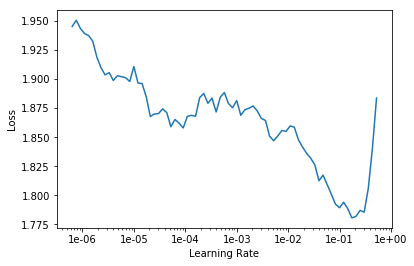

In [14]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

**Jeremy trick: try and test**

Then for learning rates, here's the learning rate finder as usual. 5e-3 seemed to work pretty well. Remember this is just a rule of thumb. 5e-3 is a bit lower than both Sylvain's rule and my rule - so Sylvain's rule is find the bottom and go back by ten, so his rule would be more like 2e-2, I reckon. My rule is kind of find about the steepest section which is about here, which again often it agrees with Sylvain's so that would be about 2e-2. I tried that and I always like to try like 10 X less and 10x more just to check. And actually I found a bit less was helpful. So the answer to the question like "should I do blah?" is always "try blah and see." Now that's how you actually become a good practitioner.

In [15]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.927891,0.931030,00:08
1,0.856149,0.885567,00:08
2,0.759878,0.832900,00:08
3,0.652201,0.812625,00:08
4,0.568865,0.811023,00:08


In [0]:
learn.save('dotprod')

So that gave me 0.813. And as usual, you can save the result to save you another 33 seconds from having to do it again later.

There's a library called LibRec and they published [some benchmarks for MovieLens 100k](https://www.librec.net/release/v1.3/example.html) and there's a root mean squared error section, and about 0.91 is about as good as they seem to have been able to get. 0.91 is the root mean square error. We use the mean square error, not the root, so we have to go to point 0.91^2 which is 0.83 and we're getting 0.81, so that's cool. With this very simple model, we're doing a little bit better, quite a lot better actually. Although as I said, take it with a grain of salt because we're not doing the same splits and the same cross validation. So we're at least highly competitive with their approaches.

We're going to look at the Python code that does this in a moment, but for now just take my word for it that we're going to see something that's just doing this:

![](https://github.com/hiromis/notes/blob/master/lesson5/15.png?raw=true)

Looking things up in an array, and then multiplying them together, adding them up, and doing the mean square error loss function. Given that and given that we noticed that the only way that can do anything interesting is by trying to find these latent factors. It makes sense to look and see what they found.Particularly since as well as finding latent factors, we also now have a specific bias number for every user and every movie.

Now, you could just say what's the average rating for each movie. But there's a few issues with that. In particular, this is something you see a lot with like anime. People who like anime just love anime, and so they're watching lots of anime and then they just rate all the anima highly. So very often on kind of charts of movies, you'll see a lot of anime at the top. Particularly if it's like a hundred long series of anime, you'll find every single item of that series in the top thousand movie list or something.



##Interpreting bias [49:29](https://youtu.be/uQtTwhpv7Ew?t=2969)

So how do we deal with that? Well the nice thing is that instead if we look at the movie bias, once we've included the user bias (which for an anime lover might be a very high number because they're just rating a lot of movies highly) and once we account for the specifics of this kind of movie (which again might be people love anime), what's left over is something specific to that movie itself. So it's kind of interesting to look at movie bias numbers as a way of saying what are the best movies or what do people really like as movies even if those people don't rate movies very highly or even if that movie doesn't have the kind of features that people tend to rate highly. **So it's kind of nice, it's funny to say this laughing, by using the bias, we get an unbiased movie score**.

How do we do that? To make it interesting particularly because this dataset only goes to 1998, let's only look at movies that are plenty of people watch. So we'll use Pandas to grab our rating_movie table, group it by title, and then count the number of ratings. Not measuring how high their rating, just how many ratings do they have.

In [0]:
learn.load('dotprod');

In [18]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [19]:
g = rating_movie.groupby(title)['rating'].count()
top_movies= g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

So the top thousand are the movies that have been rated the most, and so there hopefully movies that we might have seen. That's the only reason I'm doing this. So I've called this top_movies by which I mean not good movies, just movies we likely to have seen.

Not surprisingly, Star Wars is the one, at that point, the most people had put a rating to. Independence Day, there you go. We can then take our learner that we trained and asked it for the bias of the items listed here.

In [20]:
movie_bias=learn.bias(top_movies,is_item=True)
movie_bias.shape

torch.Size([1000])

So **is_item=True**, you would pass True to say I want the items or False to say I want the users. So this is kind of like a pretty common piece of nomenclature for collaborative filtering - these IDs (users) tend to be called users, these IDs (movies) tend to be called items, **even if your problem has got nothing to do with users and items at all. We just use these names for convenience. So they're just words**. In our case, we want the items. This (top_movies) is the list of items we want, we want the bias. **So this is specific to collaborative filtering**.

And so that's going to give us back a thousand numbers back because we asked for this has a thousand movies in it. Just for comparison, let's also group the titles by the mean rating. Then we can zip through (i.e. going through together) each of the movies along with the bias and grab their rating, the bias, and the movie. Then we can sort them all by the zero index thing which is the bias.



In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b,i,mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

Here are the lowest numbers:

In [23]:
sorted(movie_ratings,key=item0)[:15]

[(tensor(-0.4077),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3392),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3367), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2779), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2728), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2567), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2509), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2463), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2422), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2411), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2269), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2256), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2233), 'Ready to Wear (Pret-A-Porter) (1994)', 1.8333333333333333),
 (tensor(-0.2215), 'Thinner (1996)', 2.4489795918367347),
 

I can say you know Mortal Kombat Annihilation, not a great movie. Lawnmower Man 2, not a great movie. I haven't seen Children of the Corn, but we did have a long discussion at SF study group today and people who have seen it agree, not a great movie. And you can kind of see like some of them actually have pretty decent ratings. So this one's actually got a much higher rating (Island of Dr. Moreau, The (1996)) than the next one. But that's kind of saying well the kind of actors that were in this, the kind of movie that this was, and the kind of people who watch it, you would expect it to be higher.

Then here's the sort by reverse:


In [24]:
sorted(movie_ratings,key=lambda o:o[0],reverse=True)[:15]

[(tensor(0.6102), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.6073), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5616), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5466), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5359), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5351), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5134), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5118), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4970), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4748), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4738), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4726), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4475), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4434), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4326), 'To Kill a Mockingbird (1962)', 4.292237442922374)]

Schindler's List, Titanic, Shawshank Redemption - seems reasonable. Again you can kind of look for ones where the rating isn't that high but it's still very high here. So that's kind of like at least in 1998, people weren't that into Leonardo DiCaprio, people aren't that into dialogue-driven movies, or people aren't that into romances or whatever. But still people liked it more than you would have expected. It's interesting to interpret our models in this way.

##Interpreting Weights [54:27](https://youtu.be/uQtTwhpv7Ew?t=3267)

We can go a bit further and grab not just the biases but the weights.

In [25]:
movie_w = learn.weight(top_movies,is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [26]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

**PCA_Principal component Analysis**

Often, really, there isn't really conceptually 40 latent factors involved in taste, and so trying to look at the 40 can be not that intuitive. So what we want to do is, we want to squish those 40 down to just 3. And there's something that we're not going to look into called PCA stands for Principal Components Analysis. This movie_w is a torch tensor and fastai adds the PCA method to torch tensors. What Principal Components Analysis does is it's a simple linear transformation that takes an input matrix and tries to find a smaller number of columns that cover a lot of the space of that original matrix. If that sounds interesting, which it totally is, you should check out our course, computational linear algebra, which Rachel teaches where we will show you how to calculate PCA from scratch and why you'd want to do it and lots of stuff like that. It's absolutely not a prerequisite for anything in this course, but it's definitely worth knowing that taking layers of neural nets and chucking them through PCA is very often a good idea. Because very often you have way more activations than you want in a layer, and there's all kinds of reasons you would might want to play with it. For example, Francisco who's sitting next to me today has been working on something to do with image similarity. And for image similarity, a nice way to do that is to compare activations from a model, but often those activations will be huge and therefore your thing could be really slow and unwieldy. So people often, for something like image similarity, will chuck it through a PCA first and that's kind of cool. In our case, we're just going to do it so that we take our 40 components down to 3 components, so hopefully they'll be easier for us to interpret.

In [0]:
fac0,fac1,fac2=movie_pca.t()
movie_comp=[(f,i) for f,i in zip(fac0,top_movies)]

We can grab each of those three factors will call them fac0, fac1, and fac2. Let's grab that movie components and then sort. Now the thing is, we have no idea what this is going to mean. But we're pretty sure it's going to be some aspect of taste and movie feature. So if we print it out the top and the bottom, we can see that the highest ranked things on this feature, you would kind of describe them as I guess "connoisseur movies".

In [28]:
sorted(movie_comp,key=itemgetter(0),reverse=True)[:15]

[(tensor(1.3000), "McHale's Navy (1997)"),
 (tensor(1.2961), 'Home Alone 3 (1997)'),
 (tensor(1.2260), 'Jungle2Jungle (1997)'),
 (tensor(1.1971), 'Leave It to Beaver (1997)'),
 (tensor(1.1360), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.1241), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1186), 'Congo (1995)'),
 (tensor(1.1080), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.1070), 'Grease 2 (1982)'),
 (tensor(1.0704), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(1.0662), 'Bio-Dome (1996)'),
 (tensor(1.0170), 'Batman & Robin (1997)'),
 (tensor(1.0013), 'Striptease (1996)'),
 (tensor(0.9864), 'Mr. Wrong (1996)'),
 (tensor(0.9778), 'Speed 2: Cruise Control (1997)')]

In [29]:
sorted(movie_comp,key=itemgetter(0))[:15]

[(tensor(-1.1502), 'Casablanca (1942)'),
 (tensor(-1.1209), 'Close Shave, A (1995)'),
 (tensor(-1.0601), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0407), 'Chinatown (1974)'),
 (tensor(-1.0018), 'Persuasion (1995)'),
 (tensor(-0.9871), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9845), 'Godfather, The (1972)'),
 (tensor(-0.9726), 'When We Were Kings (1996)'),
 (tensor(-0.9536), 'Third Man, The (1949)'),
 (tensor(-0.9470), 'Apocalypse Now (1979)'),
 (tensor(-0.9429), 'Fargo (1996)'),
 (tensor(-0.9376), 'North by Northwest (1959)'),
 (tensor(-0.9267), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9204), 'Citizen Kane (1941)'),
 (tensor(-0.9129),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)')]

Chinatown - really classic Jack Nicholson movie. Everybody knows Casablanca, and even like Wrong Trousers is like this classic claymation movie and so forth. So yeah, this is definitely measuring like things that are very high on the connoisseur level. Where else, maybe Home Alone 3, not such a favorite with connoisseurs, perhaps. It's just not to say that there aren't people who don't like it, but probably not the same kind of people that would appreciate Secrets & Lies. So you can kind of see this idea that this has found some feature of movies and a corresponding feature of the kind of things people like.

**Let's look at another feature.**

In [0]:
movie_comp = [(f,i) for f,i in zip(fac1,top_movies)]


In [31]:
sorted(movie_comp,key=itemgetter(0),reverse=True)[:15]

[(tensor(0.9362), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8648), 'Keys to Tulsa (1997)'),
 (tensor(0.8360), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.8341), 'Brazil (1985)'),
 (tensor(0.8130), 'Stupids, The (1996)'),
 (tensor(0.8091), 'Crumb (1994)'),
 (tensor(0.8001), 'Trainspotting (1996)'),
 (tensor(0.7794), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7687), 'Clockwork Orange, A (1971)'),
 (tensor(0.7637), 'Cable Guy, The (1996)'),
 (tensor(0.7464), 'Serial Mom (1994)'),
 (tensor(0.7239), 'Sweet Hereafter, The (1997)'),
 (tensor(0.7134), 'Barbarella (1968)'),
 (tensor(0.7124), 'Lost Highway (1997)'),
 (tensor(0.7122), 'Wings of Desire (1987)')]

In [32]:
sorted(movie_comp,key = itemgetter(0))[:15]

[(tensor(-1.1816), 'Braveheart (1995)'),
 (tensor(-1.0319), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9778), 'Titanic (1997)'),
 (tensor(-0.8764), "It's a Wonderful Life (1946)"),
 (tensor(-0.8557), 'Affair to Remember, An (1957)'),
 (tensor(-0.8555), 'Forrest Gump (1994)'),
 (tensor(-0.8356), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8256), 'American President, The (1995)'),
 (tensor(-0.8222), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8210), 'Hunt for Red October, The (1990)'),
 (tensor(-0.7996), 'Shawshank Redemption, The (1994)'),
 (tensor(-0.7940), 'Pretty Woman (1990)'),
 (tensor(-0.7859), 'Air Force One (1997)'),
 (tensor(-0.7731), 'Back to the Future (1985)'),
 (tensor(-0.7683), 'Fugitive, The (1993)')]

Here's factor number one. This seems to have found... okay these are just big hits that you could watch with the family (the latter). These are definitely not that - Trainspotting very gritty thing. So again, it's kind of found this interesting feature of taste. And we could even like draw them on a graph.

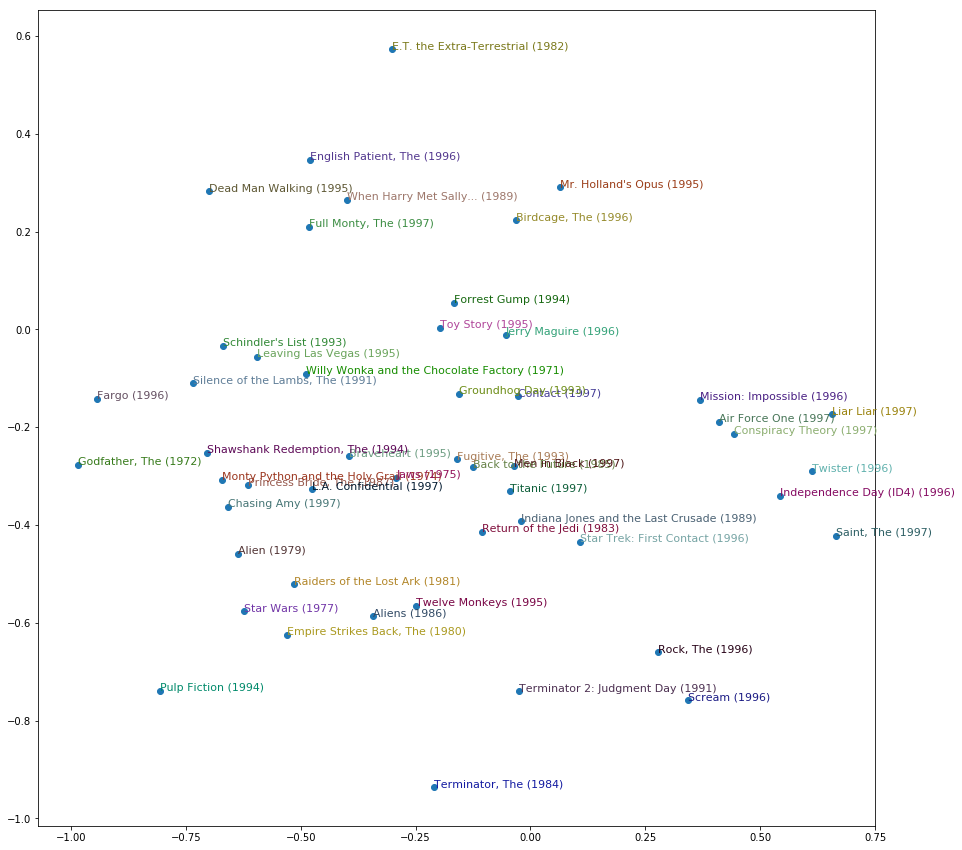

In [33]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

I've just cuddled them randomly to make them easier to see. This is just the top 50 most popular movies by how many times they've been rated. On this one factor, you've got The Terminators really high up here, and The English Patient and Schindler's List at the other end. Then The Godfather and Monty Python over here (on the right), and Independence Day and Liar Liar over there (on the left). So you get the idea. It's kind of fun. It would be interesting to see if you can come up with some stuff at work or other kind of datasets where you could try to pull out some features and play with them.

**Question:** Why am I sometimes getting negative loss when training? [59:49]

- You shouldn't be. So you're doing something wrong. Particularly since people are uploading this, I guess other people have seen it too, so put it on the forum. We're going to be learning about cross entropy and negative log likelihood after the break today. They are loss functions that have very specific expectations about what your input looks like. And if your input doesn't look like that, then they're going to give very weird answers, so probably you press the wrong buttons. So don't do that.

##collab_learner [1:00:43](https://youtu.be/uQtTwhpv7Ew?t=3643)



In [0]:
#??collab_learner



```
Signature: collab_learner(data, n_factors:int=None, use_nn:bool=False, emb_szs:Dict[str, int]=None, layers:Collection[int]=None, ps:Collection[float]=None, emb_drop:float=0.0, y_range:Union[Tuple[float, float], NoneType]=None, use_bn:bool=True, bn_final:bool=False, **learn_kwargs) -> fastai.basic_train.Learner
Source:   
def collab_learner(data, n_factors:int=None, use_nn:bool=False, emb_szs:Dict[str,int]=None, layers:Collection[int]=None, 
                   ps:Collection[float]=None, emb_drop:float=0., y_range:OptRange=None, use_bn:bool=True, 
                   bn_final:bool=False, **learn_kwargs)->Learner:
    "Create a Learner for collaborative filtering on `data`."
    emb_szs = data.get_emb_szs(ifnone(emb_szs, {}))
    u,m = data.train_ds.x.classes.values()
    if use_nn: model = EmbeddingNN(emb_szs=emb_szs, layers=layers, ps=ps, emb_drop=emb_drop, y_range=y_range, 
                                   use_bn=use_bn, bn_final=bn_final, **learn_kwargs)
    else:      model = EmbeddingDotBias(n_factors, len(u), len(m), y_range=y_range)
    return CollabLearner(data, model, **learn_kwargs)
```



Here is the collab_learner function. The collab learner function as per usual takes a data bunch. And normally learners also take something where you ask for particular architectural details. In this case, there's only one thing which does that which is basically do you want to use a multi-layer neural net or do you want to use a classic collaborative filtering. We're only going to look at the classic collaborative filtering today, or maybe we'll briefly look at the other one too, we'll see.

So what actually happens here? Well basically we create an EmbeddingDotBias model, and then we pass back a learner which has our data and that model. So obviously all the interesting stuff is happening here in EmbeddingDotBias, so let's take a look at that.

In [0]:
#??EmbeddingDotBias



```
class EmbeddingDotBias(nn.Module):
    "Base dot model for collaborative filtering."
    def __init__(self, n_factors:int, n_users:int, n_items:int, y_range:Tuple[float,float]=None):
        super().__init__()
        self.y_range = y_range
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [embedding(*o) for o in [
            (n_users, n_factors), (n_items, n_factors), (n_users,1), (n_items,1)
        ]]

    def forward(self, users:LongTensor, items:LongTensor) -> Tensor:
        dot = self.u_weight(users)* self.i_weight(items)
        res = dot.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        if self.y_range is None: return res
        return torch.sigmoid(res) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]
```



Here's our **EmbeddingDotBias** model. It is a **nn.Module**, so in PyTorch, to remind you, all PyTorch layers and models arenn.Module's. They are things that, once you create them, look exactly like a function. You call them with parentheses and you pass them arguments. But they're not functions. They don't even have `__call__`. Normally in Python, to make something look like a function, you have to give it a method called **dunder call**. Remember that means `__call__`, which doesn't exist here. The reason is that PyTorch actually expects you to have something called **forward** and that's what PyTorch will call for you when you call it like a function.

So when this model is being trained, to get the predictions it's actually going to call **forward** for us. So this (**forward**) is where we calculate our predictions. So this is where you can see, we grab our... Why is this **users** rather than **user**? That's because everything's done a mini-batch at a time. When I read the forward in a PyTorch module, I tend to ignore in my head the fact that there's a mini batch. And I pretend there's just one. Because PyTorch automatically handles all of the stuff about doing it to everything in the mini batch for you. So let's pretend there's just one user. So grab that user and what is this **self.u_weight**? **self.u_weight** is an embedding. We create an embedding for each of users by factors, items by factors, users by one, items by one. That makes sense, right? So users by one is the user's bias. Then users by factors is feature/embedding. So users by factors is the first tuple, so that's going to go in **u_weight** and **(n_users,1)** is the third, so that's going to go in **u_bias**.

Remember, when PyTorch creates our **nn.Module**, it calls **dunder init**. So this is where we have to create our weight matrices. We don't normally create the actual weight matrix tensors. We normally use PyTorch's convenience functions to do that for us, and we're going to see some of that after the break. For now, just recognize that this function is going to create an embedding matrix for us. It's going to be a PyTorch **nn.Module** as well, so therefore to actually pass stuff into that embedding matrix and get activations out, you treat it as if it was a function - stick it in parentheses. So if you want to look in the PyTorch source code and find **nn.Embedding**, you will find there's something called **.forward** in there which will do this array lookup for us.

[1:05:29](https://youtu.be/uQtTwhpv7Ew?t=3929)

**def forward()**

Here's where we grab the users **(self.u_weight(users))**, here's where we grab the items **(self.i_weight(items))**. So we've now got the embeddings for each. So at this point, we multiply them together and sum them up, and then we add on the user bias and the item bias. Then if we've got a **y_range**, then we do our sigmoid trick. So the nice thing is, you now understand the entirety of this model. This is not just any model. This is a model that we just found which is at the very least highly competitive with and perhaps slightly better than some published table of pretty good numbers from a software group that does nothing but this. So you're doing well. This is nice.




#Embeddings are amazing[1:07:03](https://youtu.be/uQtTwhpv7Ew?t=4023)

This idea of interpreting embeddings is really interesting. As we'll see later in this lesson, the things that we create for categorical variables more generally in tabular data sets are also embedding matrices. And again, that's just a normal matrix multiplied by a one hot encoded input where we skip the computational and memory burden of it by doing it in a more efficient way, and it happens to end up with these interesting semantics kind of accidentally. There was this [really interesting paper](https://arxiv.org/abs/1604.06737) by these folks who came second in a Kaggle competition for something called Rossman. We will probably look in more detail at the Rossman competition in part two. I think we're gonna run out of time in part one. But it's basically this pretty standard tabular stuff. The main interesting stuffs in the pre-processing. And it was interesting because they came second despite the fact that the person who came first and pretty much everybody else who was the top of the leaderboard did a massive amount of highly specific feature engineering. Where else, these folks did way less feature engineering than anybody else. But instead they used a neural net, and this was at a time in 2016 when just no one did that. No one was doing neural nets for tabular data.

So the kind of stuff that we've been talking about kind of arose there or at least was kind of popularized there. And when I say popularized, I mean only popularized a tiny bit - still most people are unaware of this idea. But it's pretty cool because in their paper they showed that the main average percentage error for various techniques K nearest neighbors, random forests, and gradient boosted trees:

![alt text](https://github.com/hiromis/notes/raw/master/lesson5/19.png?raw=true)

First, you know, neural nets just worked a lot better but then with entity embeddings (which is what they call this using entity matrices in tabular data), they actually added the entity embeddings to all of these different tasks after training them and they all got way better. So neural nets with entity embeddings are still the best but a random forest with empty embeddings was not at all far behind. That's kind of nice because you could train these entity matrices for products or stores or genome motifs or whatever and then use them in lots of different models, possibly using faster things like random forests but getting a lot of the benefits.

![](https://github.com/hiromis/notes/blob/master/lesson5/20.png?raw=true)

But here is something interesting. They took a two-dimensional projection of their embedding matrix for German state because this was a German supermarket chain using the same kind of approach we did - I don't remember if they use PCA or something else slightly different. And then here's the interesting thing. I've circled here a few things in this embedding space, and I've circled it with the same color over here and it's like "oh my god, the embedding projection has actually discovered geography." They didn't do that but it's found things that are near by each other in grocery purchasing patterns because this was about predicting how many sales there will be. There is some Geographic element of that.

![](https://github.com/hiromis/notes/raw/master/lesson5/21.png?raw=true)

In fact, here is a graph of the distance between two embedding vectors. So you can just take an embedding vector and say what's the sum of squared compared to some other embedding vector. That's the Euclidean distance (i.e. what's the distance in embedding space) and then plotted against the distance in real life between shops, and you get this very strong positive correlation.

![](https://github.com/hiromis/notes/blob/master/lesson5/22.png?raw=true)

Here is an embedding space for the days of the week, and as you can see there's a very clear path through them. Here's the embedding space for the month of the year, and again there's a very clear path through them.

Embeddings are amazing, and I don't feel like anybody's even close to exploring the kind of interpretation that you could get. So if you've got genome motifs or plant species or products that your shop sells or whatever, it would be really interesting to train a few models, try and fine tune some embeddings, and then start looking at them in these ways in terms of similarity to other ones and clustering them and projecting them into 2d spaces and whatever. I think is really interesting.



#Regularization: Weight Decay [1:12:09](https://youtu.be/uQtTwhpv7Ew?t=4329)

We were trying to make sure we understood what every line of code did in this some pretty good collab learner model we built. The one piece missing is this **wd** piece, and **wd stands for weight decay**. So what is weight decay? Weight decay is a type of regularization. What is regularization?

![alt text](https://github.com/hiromis/notes/blob/master/lesson3/1.png?raw=true)

Let's start by going back to this nice little chart that Andrew Ng did in his terrific machine learning course where he plotted some data and then showed a few different lines through it. This one here, because Andrew's at Stanford he has to use Greek letters. We can say this is $a+bx$ but if you want to go there $\theta_{0} + \theta_{1}x$ is a line. It's a line even if it's got a Greek letters. Here's a second-degree polynomial $a +bx+cx^{2}$ - bit of curve, and here's a high degree polynomial which is curvy as anything.

So models with more parameters tend to look more like this. In traditional statistics, we say "let's use less parameters" because we don't want it to look like this. Because if it looks like this, then the predictions far left and far right, they're going to be all wrong. It's not going to generalize well. We're overfitting. So we avoid overfitting by using less parameters. So if any of you are unlucky enough to have been brainwashed by a background in statistics or psychology or econometrics or any of these kinds of courses, you're gonna have to unlearn the idea that you need less parameters. Because what you instead need to realize is you were fed this lie that you need less parameters because it's a convenient fiction for the real truth which is you don't want your function to be too complex. Having less parameters is one way of making it less complex. But what if you had a thousand parameters and 999 of those parameters were 1e-9? What if they were 0? If they were 0, they're not really there. Or if they were 1e-9, they're hardly there. So why can't I have lots of parameters if lots of them are really small? And the answer is you can. So this thing of counting the number of parameters is how we limit complexity is actually extremely limiting.**It's a fiction that really has a lot of problems. So if in your head complexity is scored by how many parameters you have, you're doing it all wrong. Score it properly**

So why do we care? Why would I want to use more parameters? Because more parameters means more nonlinearities, more interactions, more curvy bits. And real life is full of curvy bits. **Real life does not look like a straight line**. But we don't want them to be more curvy than necessary or more interacting than necessary. **Therefore let's use lots of parameters and then penalize complexity**. 
- So one way to penalize complexity (as I kind of suggested before) is let's sum up the value of your parameters. Now that doesn't quite work because some parameters are positive and some are negative. So what if we sum up the square of the parameters, and that's actually a really good idea.

Let's actually create a model, and in the loss function we're going to add the sum of the square of the parameters. Now here's a problem with that though. Maybe that number is way too big, and it's so big that the best loss is to set all of the parameters to zero. That would be no good. So we want to make sure that doesn't happen, so therefore let's not just add the sum of the squares of the parameters to the model but let's multiply that by some number that we choose. That number that we choose in fastai is called **wd**. That's what we are going to do. We are going take our loss function and we're going to add to it the sum of the squares of parameters multiplied by some number **wd**.

What should that number be? Generally, it should be 0.1. People with fancy machine learning PhDs are extremely skeptical and dismissive of any claims that a learning rate can be 3e-3 most of the time or a weight decay can be 0.1 most of the time. But here's the thing - we've done a lot of experiments on a lot of datasets, and we've had a lot of trouble finding anywhere a weight decay of 0.1 isn't great. However we don't make that the default. We actually make the default 0.01. Why? Because in those rare occasions where you have too much weight decay, no matter how much you train it just never quite fits well enough. Where else if you have too little weight decay, you can still train well. You'll just start to overfit, so you just have to stop a little bit early.

So we've been a little bit conservative with our defaults, but my suggestion to you is this. Now that you know that every learner has a **wd** argument and I should mention you won't always see it in this list:

![](https://github.com/hiromis/notes/blob/master/lesson5/23.png?raw=true)

Because there's this concept of `**kwargs` in Python which is basically parameters that are going to get passed up the chain to the next thing that we call. So basically all of the learners will call eventually this constructor:

![](https://github.com/hiromis/notes/blob/master/lesson5/24.png?raw=true)

And this constructor has a **wd**. So this is just one of those things that you can either look in the docs or you now know it. Anytime you're constructing a learner from pretty much any kind of function in fastai, you can pass wd. And passing 0.1 instead of the default 0.01 will often help, so give it a go.

##Going back to Lesson2 SGD notebook [1:19:16](https://youtu.be/uQtTwhpv7Ew?t=4756)

So what's really going on here? It would be helpful to go back to lesson 2 SGD because everything we're doing for the rest of today really is based on this.

We created some data, we added at a loss function MSE, and then we created a function called update which calculated our predictions. That's our weight make matrix multiply:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/25.png?raw=true)

This is just a one layer so there's no ReLU. We calculated our loss using that mean squared error. We calculated the gradients using loss.backward. We then subtracted in place the learning rate times the gradients, and that is gradient descent. If you haven't reviewed lesson two SGD, please do because this is our starting point. So if you don't get this, then none of this is going to make sense. If you watching the video, maybe pause now go back, re-watch this part of lesson 2, make sure you get it.

Remember **a.sub_** is basically the same as **a -=** because **a.sub** is subtract and everything in PyTorch, if you add an underscore to it means do it in place. So this is updating our a parameters which started out as `[-1., 1.]`- we just arbitrary picked those numbers and it gradually makes them better.

Let's write that down so we are trying to calculate the parameters (I'm going to call them weights because this is more common) in epoch t or time t. And they're going to be equal to whatever the weights were in the previous epoch minus our learning rate multiplied by the derivative of our loss function with respect to our weights at time t-1.

$w_{t}=w_{t-1}-lr\times \frac{dL}{dw_{t-1}}$

That's what this is doing:

![](https://github.com/hiromis/notes/raw/master/lesson5/26.png?raw=true)

We don't have to calculate the derivative because it's boring and because computers do it for us fast, and then they store it in **grad** for us, so we're good to go. Make sure you're exceptionally comfortable with either that equation or that line of code because they are the same thing.

What's our loss? Our loss is some function of our independent variables X and our weights (L(x,w)). In our case, we're using mean squared error, for example, and it's between our predictions and our actuals.

$L(x,w)=mse(\widehat{y},y)$

Where does X and W come in? Well our predictions come from running some model (we'll call it m) on those predictions and that model contains some weights. So that's what our loss function might be:

$L(x,w)=mse(m(x,w),y)$

And this might be all kinds of other loss functions, we will see some more today. So that's what ends up creating a.grad over here.

We're going to do something else. We're going to add weight decay which in our case is 0.1 times the sum of weights squared.

$L(x,w)=mse(m(x,w),y)+wd\cdot \sum w^{2}$



#MNIST SGD from scratch [1:23:59](https://youtu.be/uQtTwhpv7Ew?t=5039)

[lesson5-sgd-mnist.ipynb](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson5-sgd-mnist.ipynb)





In [0]:
%matplotlib inline
from fastai.basics import *


Get the 'pickled' MNIST dataset from http://deeplearning.net/data/mnist/mnist.pkl.gz. We're going to treat it as a standard flat dataset with fully connected layers, rather than using a CNN.

In [37]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2019-04-30 02:10:31--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  6.41MB/s    in 2.4s    

2019-04-30 02:10:34 (6.41 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [0]:
os.makedirs('/root/.fastai/data/mnist',exist_ok=True)

In [39]:
shutil.move("/content/mnist.pkl.gz", "/root/.fastai/data/mnist") 

'/root/.fastai/data/mnist/mnist.pkl.gz'

So let's do that and let's make it interesting by not using synthetic data but let's use some real data. We're going to use MNIST - the hand-drawn digits. But we're going to do this as a standard fully connected net, not as a convolutional net because we haven't learnt the details of how to really create one of those from scratch. So in this case, is actually deeplearning.net provides MNIST as a Python pickle file, in other words it's a file that Python can just open up and it'll give you numpy arrays straight away. They're flat numpy arrays, we don't have to do anything to them. So go grab that and it's a gzip file so you can actually just **gzip.open** it directly and then you can **pickle.load** it directly, and again **encoding='latin-1'**.

In [0]:
path = Config().data_path()/'mnist'

In [41]:
path.ls()

[PosixPath('/root/.fastai/data/mnist/mnist.pkl.gz')]

In [0]:
with gzip.open(path/'mnist.pkl.gz','rb') as f:
    ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f,encoding='latin-1')

That'll give us the training, the validation, and the test set. I don't care about the test set, so generally in Python if there's something you don't care about, you tend to use this special variable called underscore `(_)`. There's no reason you have to. It's just people know you mean I don't care about this. So there's our training x & y, and a valid x & y.

Now this actually comes in as the shape 50,000 rows by 784 columns, but those 784 columns are actually 28 by 28 pixel pictures. So if I reshape one of them into a 28 by 28 pixel picture and plot it, then you can see it's the number five:

(50000, 784)

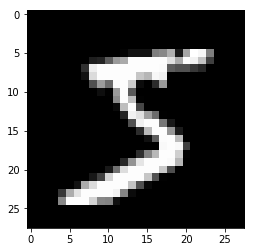

In [43]:
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')
x_train.shape

So that's our data. We've seen MNIST before in its pre-reshaped version, here it is in flattened version. So I'm going to be using it in its flattened version.

Currently they are numpy arrays. I need them to be tensors. So I can just map torch.tensor across all of them, and so now they're tensors.

In [44]:
x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))
n,c= x_train.shape
x_train.shape,y_train.min(),y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

I may as well create a variable with the number of things I have which we normally call **n**. Here, we use **c** to mean the number of columns (that's not a great name for it sorry). So there we are. Then the **y** not surprisingly the minimum value is 0 and the maximum value is 9 because that's the actual number we're gonna predict.

[1:26:38](https://youtu.be/uQtTwhpv7Ew?t=5198)

In lesson 2 SGD, we created a data where we actually added a column of 1's on so that we didn't have to worry about bias:

```
x = torch.ones(n,2) 
def mse(y_hat, y): return ((y_hat-y)**2).mean()
y_hat = x@a
```
We're not going to do that. We're going to have PyTorch to do that implicitly for us. We had to write our own MSE function, we're not going to do that. We had to write our own little matrix multiplication thing, we're not going to do that. We're gonna have PyTorch do all this stuff for us now.

What's more and really important, we're going to do mini batches because this is a big enough dataset we probably don't want to do it all at once. So if you want to do mini batches, so we're not going to use too much fastai stuff here, PyTorch has something called TensorDataset that basically grabs two tensors and creates a dataset, Remember a dataset is something where if you index into it, you get back an x value and a y value - just one of them. It looks a lot like a list of xy tuples.


In [0]:
bs = 64
train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_valid,y_valid)
data = DataBunch.create(train_ds,valid_ds,bs=bs)

In [0]:
#??DataBunch.create



```
Signature: DataBunch.create(train_ds:torch.utils.data.dataset.Dataset, valid_ds:torch.utils.data.dataset.Dataset, test_ds:Union[torch.utils.data.dataset.Dataset, NoneType]=None, path:Union[pathlib.Path, str]='.', bs:int=64, val_bs:int=None, num_workers:int=2, dl_tfms:Union[Collection[Callable], NoneType]=None, device:torch.device=None, collate_fn:Callable=<function data_collate at 0x7fa8b51dad08>, no_check:bool=False, **dl_kwargs) -> 'DataBunch'
Source:   
    @classmethod
    def create(cls, train_ds:Dataset, valid_ds:Dataset, test_ds:Optional[Dataset]=None, path:PathOrStr='.', bs:int=64,
               val_bs:int=None, num_workers:int=defaults.cpus, dl_tfms:Optional[Collection[Callable]]=None,
               device:torch.device=None, collate_fn:Callable=data_collate, no_check:bool=False, **dl_kwargs)->'DataBunch':
        "Create a `DataBunch` from `train_ds`, `valid_ds` and maybe `test_ds` with a batch size of `bs`. Passes `**dl_kwargs` to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        dls = [DataLoader(d, b, shuffle=s, drop_last=s, num_workers=num_workers, **dl_kwargs) for d,b,s in
               zip(datasets, (bs,val_bs,val_bs,val_bs), (True,False,False,False)) if d is not None]
        return cls(*dls, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)
```



Once you have a dataset, then you can use a little bit of convenience by calling **DataBunch.create** and what that is going to do is it's going to create data loaders for you. A data loader is something which you don't say I want the first thing or the fifth thing, you just say I want the "next" thing, and it will give you a mini batch of whatever size you asked for. Specifically it'll give you the X and the y of a mini batch. So if I just grab the **next** of the iterator (this is just standard Python). Here's my training data loader **(data.train_dl)** that **DataBunch.create** creates for you. You can check that as you would expect the X is 64 by 784 because there's 784 pixels flattened out, 64 in a mini batch and the Y is just 64 numbers - they are things we're trying to predict.

In [47]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

If you look at the source code for DataBunch.create, you'll see there's not much there, so feel free to do so. We just make sure that your training set gets randomly shuffled for you. We make sure that the data is put on the GPU for you. Just a couple of little convenience things like that. But don't let it be magic. If it feels magic check out the source code to make sure you see what's going on.

Rather than do this **y_hat = x@a** thing, we're going to create an **nn.Module**. If you want to create an **nn.Module** that does something different to what's already out there, you have to subclass it. So sub classing is very very very normal in PyTorch. So if you're not comfortable with sub classing stuff in Python, go read a couple of tutorials to make sure you are. The main thing is you have to override the constructor dunder init `(__init__)` and make sure that you call the super class' constructor (`super().__init__()`) because nn.Module super class' constructor is going to set it all up to be a proper nn.Module for you. So if you're trying to create your own PyTorch subclass and things don't work, it's almost certainly because you forgot this line of code.



In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10,bias=True)
        
    def forward(self,xb) : return self.lin(xb)

[1:30:04](https://youtu.be/uQtTwhpv7Ew?t=5404)

So the only thing we want to add is we want to create an attribute in our class which contains a linear layer an **nn.Linear** module. What is an nn.Linear module? 
- It's something which does **x@a**, but actually it doesn't only do that, it actually is **x@a + b**. So in other words, we don't have to add the column of ones. That's all it does. If you want to play around, why don't you try and create your own **nn.Linear** class? You could create something called MyLinear and it'll take you (depending on your PyTorch background) an hour or two. We don't want any of this to be magic, and you know all of the things necessary to create this now. So these are the kind of things that you should be doing for your assignments this week. Not so much new applications but try to start writing more of these things from scratch and get them to work. Learn how to debug them, check what's going in and out and so forth.

But we could just use nn.Linear and that's this going to do so it's going to have a def forward in it that goes **a@x + b**. Then in our forward, how do we calculate the result of this? Remember, every **nn.Module** looks like a function, so we pass our X mini-batch so I tend to use xb to mean a batch of X to **self.lin** and that's going to give us back the result of the **a@x + b** on this mini batch.

So this is a logistic regression model. A logistic regression model is also known as a neural net with no hidden layers, so it's a one layer neural net, no nonlinearities.

Because we're doing stuff ourself a little bit we have to put the weight matrices (i.e. the parameters) onto the GPU manually. So just type **.cuda()** to do that.

In [0]:
model = Mnist_Logistic().cuda()

In [50]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

Here's our model. As you can see the nn.Module machinery has automatically given us a representation of it. It's automatically stored the **.lin** thing, and it's telling us what's inside it.

In [51]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [52]:
model(x).shape

torch.Size([64, 10])

In [53]:
[p.shape for p  in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

So there's a lot of little conveniences that PyTorch does for us. If you look now at **model.lin**, you can see, not surprisingly, here it is.

Perhaps the most interesting thing to point out is that our model automatically gets a bunch of methods and properties. And perhaps the most interesting one is the one called **parameters** which contains all of the yellow squares from our picture. It contains our parameters. It contains our weight matrices and bias matrices in as much as they're different. So if we have a look at **p.shape for p in model.parameters()**, there's something of 10 by 784, and there's something of 10. So what are they? 10 by 784 - so that's the thing that's going to take in 784 dimensional input and spit out a 10 dimensional output. That's handy because our input is 784 dimensional and we need something that's going to give us a probability of 10 numbers. After that happens we've got ten activations which we then want to add the bias to, so there we go. Here's a vector of length 10. So you can see why this model we've created has exactly the stuff that we need to do our **a@x+b**.

[1:33:40](https://youtu.be/uQtTwhpv7Ew?t=5620)



In [0]:
lr = 2e-2


In [0]:
loss_func = nn.CrossEntropyLoss()


Let's grab a learning rate. We're going to come back to this loss function in a moment but we can't really use MSE for this because we're not trying to see "how close are you". Did you predict 3 and actually it was 4, gosh you were really close. No, 3 is just as far away from 4 as 0 is away from 4 when you're trying to predict what number did somebody draw. So we're not going to use MSE, we're going to use cross-entropy loss which we'll look at in a moment.

In [0]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat,y) + w2 * wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr*p.grad)
            p.grad.zero_()
    return loss.item()

Here's our **update** function. I copied it from lesson 2 SGD, but now we're calling our model rather than going **a@x**. We're calling our model as if it was a function to get **y_hat** and we're calling our **loss_func rather than calling MSE to get our loss**. 

Then the rest is all the same as before except rather than going through each parameter and going parameter. **`sub_(learning_rate*gradient)`**, we loop through the parameters. Because very nicely for us, PyTorch will automatically create this list of the parameters of anything that we created in our dunder init.

And look, I've added something else. I've got this thing called **w2**, I go through each **p in model.parameters()** and I add to **w2** the sum of squares. So **w2 now contains my sum of squared weights**. Then I multiply it by some number which I set to 1e-5. So now I just implemented weight decay. So when people talk about weight decay, it's not an amazing magic complex thing containing thousands of lines of CUDA C++ code. **It's those two lines of Python**:


```
  w2 = 0.
  for p in model.parameters(): w2 += (p**2).sum()
```
That's weight decay. This is not a simplified version that's just enough for now, this is weight decay. That's it.

So here's the thing. There's a really interesting kind of dual way of thinking about weight decay. One is that we're adding the sum of squared weights and that seems like a very sound thing to do and it is. Well, let's go ahead and run this.



In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

Here I've just got a list comprehension that's going through my data loader. The data loader gives you back one mini batch for the whole thing giving you XY each time, I'm gonna call update for each. Each one returns loss. Now PyTorch tensors, since I did it all on the GPU that's sitting in the GPU. And it's got all these stuff attached to it to calculate gradients, it's going to use up a lot of memory. So if you called **loss.item()** on a scalar tensor, it turns it into an actual normal Python number. So this is just means I'm returning back normal Python numbers.

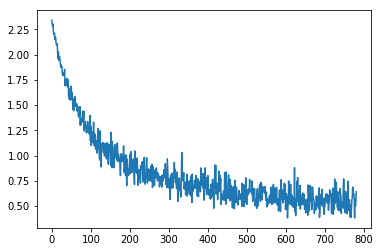

In [58]:
plt.plot(losses);

And then I can plot them, and there you go. My loss function is going down. It's really nice to try this stuff to see it behaves as you expect. We thought this is what would happen - as we get closer and closer to the answer it bounces around more and more, because we're kind of close to where we should be. It's probably getting flatter in weight space, so we kind of jumping further. So you can see why we would probably want to be reducing our learning rate as we go (i.e. learning rate annealing).

Now here's the thing.

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/29.png?raw=true)

That $(wd\cdot \sum w^{2})$ is only interesting for training a neural net because it appears here (dL). Because we take the gradient of it. That's the thing that actually updates the weights. So actually the only thing interesting about $wd\cdot \sum w^{2}$ is its gradient. So we don't do a lot of math here, but I think we can handle that. The gradient of this whole thing if you remember back to your high school math is equal to the gradient of each part taken separately and then add them together. So let's just take the gradient of that $(wd\cdot \sum w^{2})$ because we already know the gradient of this $(L(x,w)=mse(m(x,w),y))$ is just whatever we had before. So what's the gradient of $wd\cdot \sum w^{2}$?

Let's remove the sum and pretend there's just one parameter. It doesn't change the generality of it. So the gradient of $wd\cdot w^{2}$ - what's the gradient of that with respect to w?

$\frac{d}{dw}wd\cdot w^{2} = 2wd\cdot w$

It's just $2wd\cdot w$. So remember this (wd) is our constant which in that little loop was 1e-5. And w is our weights. We could replace wd with like 2wd without loss of generality, so let's throw away the 2. So in other words, all weight decay does is it subtracts some constant times the weights every time we do a batch. That's why it's called weight decay.

- When it's in this form $(wd\cdot w^{2})$ where we add the square to the loss function, that's called **L2 regularization**.

- When it's in this form $(wd\cdot w)$ where we subtract wd times weights from the gradients, that's called **weight decay**.

They are kind of mathematically identical. For everything we've seen so far, in fact they are mathematically identical. And we'll see in a moment a place where they're not - where things get interesting. So this is just a really important tool you now have in your toolbox. You can make giant neural networks and still avoid overfitting by adding more weight decay. Or you could use really small datasets with moderately large sized models and avoid overfitting with weight decay. It's not magic. You might still find you don't have enough data in which case you get to the point where you're not overfitting by adding lots of weight decay and it's just not training very well - that can happen. But at least this is something that you can now play around with.

##MNIST neural network [1:40:33](https://youtu.be/uQtTwhpv7Ew?t=6033)

Now that we've got this update function, we could replace this Mnist_Logistic with MNIST neural networketwork and build a neural network from scratch.



In [0]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784,50,bias=True)
        self.lin2 = nn.Linear(50,10,bias=True)
    def forward(self,xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)
    

Now we just need two linear layers. In the first one, we could use a weight matrix of size 50. We need to make sure that the second linear layer has an input of size 50 so it matches. The final layer has to have an output of size 10 because that's the number of classes we're predicting. So now our **forward** just goes:

- do a linear layer
- calculate ReLU
- do a second linear layer

Now we've actually created a neural net from scratch. I mean we didn't write nn.Linear but you can write it yourself or you could do the matrices directly - you know how to.

Again we can go model dot CUDA, and then we can calculate losses for the exact same update function, there it goes.

In [0]:
model = Mnist_NN().cuda()


In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

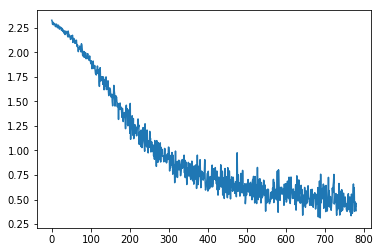

In [62]:
plt.plot(losses);

So this is why this idea of neural nets is so easy. Once you have something that can do gradient descent, then you can try different models. 

Then you can start to add more PyTorch stuff. Rather than doing all this stuff yourself (update function), why not just go **opt = optim.something**? So the "something" we've done so far is SGD.

In [0]:
def update(x,y,lr):
    opt = optim.SGD(model.parameters(),lr)
    y_hat = model(x)
    loss = loss_func(y_hat,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

Now you're saying to PyTorch I want you to take these parameters and optimize them using SGD. So this now, rather than saying **for p in parameters: p -= lr * p.grad**, you just say **opt.step()**. It's the same thing. It's just less code and it does the same thing. **But the reason it's kind of particularly interesting is that now you can replace SGD with Adam for example and you can even add things like weight decay because there's more stuff in these things for you**. So that's why we tend to use optim.blah. So behind the scenes, this is actually what we do in fastai.

[1:42:54](https://youtu.be/uQtTwhpv7Ew?t=6174)

So if I go **optim.SGD** , the plot looks like before:

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

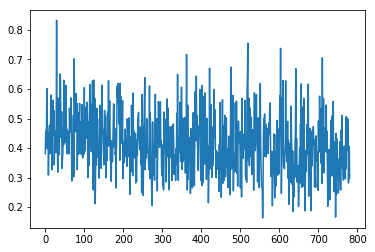

In [65]:
plt.plot(losses);

**But if we change to a different optimizer (Adam), look what happened:**

In [0]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(),lr)
    y_hat = model(x)
    loss = loss_func(y_hat,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

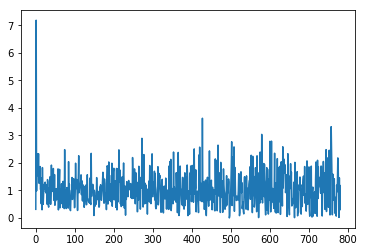

In [68]:
plt.plot(losses);

It diverged. We've seen a great picture of that from one of our students who showed what divergence looks like. This is what it looks like when you try to train something. Since we're using a different optimizer, we need a different learning rate. And you can't just continue training because by the time it's diverged, the weights are really really big and really really small - they're not going to come back. So start again.

In [0]:
losses = [update(x,y,1e-3) for x,y in data.train_dl]

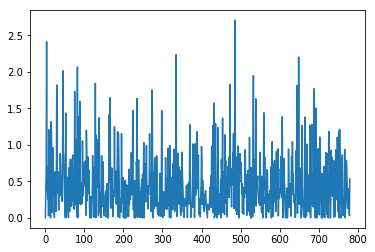

In [72]:
plt.plot(losses);

Okay, there's a better learning rate. But look at this - we're down underneath 0.5 by about epoch 200. Whereas before (with SGD), I'm not even sure we ever got to quite that level. So what's going on? What's Adam? Let me show you.

##Adam [1:43:56](https://youtu.be/uQtTwhpv7Ew?t=6236)

We're gonna do gradient descent in Excel because why wouldn't you. So here is some randomly generated data:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/35.png?raw=true)

They're randomly generated X's' and the Y's are all calculated by doing **ax + b** where a is 2 and b is 30. So this is some data that we have to try and match. Here is SGD:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/36.png?raw=true)

So we have to do it with SGD. Now in our lesson 2 SGD notebook, we did the whole dataset at once as a batch. In the notebook we just looked at, we did mini batches. In this spreadsheet, we're going to do online gradient descent which means every single row of data is a batch. So it's kind of a batch size of one.

As per usual, we're going to start by picking an intercept and slope kind of arbitrarily, so I'm just going to pick 1 - doesn't really matter. Here I've copied over the data. This is my x and y and my intercept and slope, as I said, is 1. I'm just literally referring back to cell (C1) here.

So my prediction for this particular intercept and slope would be 14 times one plus one which is 15, and there is my squared error:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/37.png?raw=true)

Now I need to calculate the gradient so that I can update. **There's two ways you can calculate the gradient**. 

- One is analytically and so I you know you can just look them up on Wolfram Alpha or whatever so there's the gradients (de/db=2(ax+b-y)) if you write it out by hand or look it up.

- Or you can do something called finite differencing because remember gradient is just how far the the outcome moves divided by how far your change was for really small changes. So let's just make a really small change.

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/38.png?raw=true)

Here we've taken our intercept and added 0.01 to it, and then calculated our loss. You can see that our loss went down a little bit and we added 0.01 here, so our derivative is that difference divided by that 0.01:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/39.png?raw=true)

That's called **finite differencing**. You can always do derivatives over finite differencing. It's slow. We don't do it in practice, but it's nice for just checking stuff out. So we can do the same thing for our a term, add 0.01 to that, take the difference and divide by 0.01.

![](https://github.com/hiromis/notes/blob/master/lesson5/40.png?raw=true)

Or as I say, we can calculate it directly using the actual derivative analytical and you can see **est de/db** and **de/db** are as you'd expect very similar (as well as **est de/da** and **de/da**).

So gradient descent then just says let's take our current value of that weight (slope) and subtract the learning rate times the derivative - there it is (**new a, new b**). And so now we can copy that intercept and that slope to the next row, and do it again. And do it lots of times, and at the end we've done one epoch.

At the end of that epoch, we could say "oh great so this is our slope, so let's copy that over to where it says slope, and this is our intercept so I'll copy it to where it says intercept, and now it's done another epoch."

So that's kind of boring I'm copying and pasting so I created a very sophisticated macro which copies and pastes for you (I just recorded it) and then I created a very sophisticated for loop that goes through and does it five times:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/41.png?raw=true)

I attach that to the Run button, so if I press run, it'll go ahead and do it five times and just keep track of the error each time.

![](https://github.com/hiromis/notes/raw/master/lesson5/42.png?raw=true)

So that is SGD. As you can see, it is just infuriatingly slow like particularly the intercept is meant to be 30 and we're still only up to 1.57, and it's just going so slowly. **So let's speed it up by using Momentum**



##Momentum [1:48:40](https://youtu.be/uQtTwhpv7Ew?t=6520)

The first thing we can do to speed it up is to use something called momentum. Here's the exact same spreadsheet as the last worksheet. I've removed the finite differencing version of the derivatives because they're not that useful, just the analytical ones here. **de/db** where I take the the derivative and I'm going to update by the derivative.

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/43.png?raw=true)

But what I do is I take the derivative and I multiply it by 0.1. And what I do is I look at the previous update and I multiply that by 0.9 and I add the two together. So in other words, the update that I do is not just based on the derivative but 1/10 of it is the derivative and 90% of it is just the same direction I went last time. This is called momentum. What it means is, remember how we thought about what might happen if you're trying to find the minimum of this.

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/momentum.gif?raw=true)

You were here and your learning rate was too small, and you just keep doing the same steps. Or if you keep doing the same steps, then if you also add in the step you took last time, and your steps are going to get bigger and bigger until eventually they go too far. But now, of course, your gradient is pointing the other direction to where your momentum is pointing. So you might just take a little step over here, and then you'll start going small steps, bigger steps, bigger steps, small steps, bigger steps, like that. That's kind of what momentum does.

If you're going too far like this which is also slow all, then the average of your last few steps is actually somewhere between the two, isn't it? So this is a really common idea - when you have something that says my step at time T equals some number (people often use alpha because gotta love these Greek letters) times the actual thing I want to do (in this case it's the gradient) plus one minus alpha times whatever you had last time ($S_{t-1}$):

$S_{t}=\alpha\cdot g+(1-\alpha )S_{t-1}$

This is called an exponentially weighted moving average. The reason why is that, if you think about it, these (1-\alpha ) are going to multiply. So if $S_{t-2}$ is in here with $(1-\alpha )^{2}$ and $S_{t-3}$ is in there with $(1-\alpha )^{3}$.

So in other words $S_{t}$ ends up being the actual thing I want $(\alpha \cdot g)$ plus a weighted average of the last few time periods where the most recent ones are exponentially higher weighted. And this is going to keep popping up again and again. So that's what momentum is. It says I want to go based on the current gradient plus the exponentially weighted moving average of my last few steps. So that's useful. That's called SGD with momentum, and we can do it by changing:



```
opt = optim.Adam(model.parameters(), lr)

to 

opt = optim.Adam(model.parameters(), lr,momentum=0.9)
```

Momentum 0.9 is really common. It's so common it's always 0.9 (just about) four basic stuff. So that's how you do SGD with momentum. And again I didn't show you some simplified version, I showed you "the" version. That is SGD. Again you can write your own. Try it out. That would be a great assignment would be to take lesson 2 SGD and add momentum to it; or even the new notebook we've got MNIST, get rid of the **optim.** and write your own update function with momentum.





##RMSProp [1:53:30](https://youtu.be/uQtTwhpv7Ew?t=6810)

Then there's a cool thing called RMSProp. One of the really cool things about RMSProp is that Geoffrey Hinton created it (a famous neural net guy). Everybody uses it. It's like really popular and common. The correct citation for RMSProp is the Coursera online free MOOC. That's where he first mentioned RMSProp so I love this thing that cool new things appear in MOOCs not a paper.

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/44.png?raw=true)

So RMSProp is very similar to momentum but this time we have an exponentially weighted moving average not of the gradient updates but of **F8 squared - that's the gradient squared**.  So what the gradient squared times 0.1 plus the previous value times 0.9. This is an exponentially weighted moving average of the gradient squared. 

So what's this number going to mean? Well if my gradient is really small and consistently really small, this will be a small number. If my gradient is highly volatile, it's going to be a big number. Or if it's just really big all the time, it'll be a big number.

Why is that interesting? Because when we do an update this time we say weight minus learning rate times gradient divided by the square root of this (shown as x below).

$weight -\frac{ lr\cdot g}{x^{2}}$

So in other words, if our gradient is consistently very small and not volatile, let's take bigger jumps. That's kind of what we want, right? When we watched how the intercept moves so darn slowly, it's like obviously you need to just try to go faster.

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/45.png?raw=true)

So if I now run this, after just 5 epochs, this is already up to 3. Where else, with the basic version after five epochs it's still at 1.27. Remember, we have to get to 30.



##Adam [1:55:44](https://youtu.be/uQtTwhpv7Ew?t=6944) = RMSProp + momentum

So the obvious thing to do (and by obvious I mean only a couple of years ago did anybody actually figure this out) is do both. So that's called Adam. **So Adam is simply keep track of the exponentially weighted moving average of the gradient squared (RMSProp) and also keep track of the exponentially weighted moving average of my steps (momentum). And both divided by the exponentially weighted moving average of the squared terms and take 0.9 of a step in the same direction as last time**. So it's momentum and RMSProp - that's called Adam. And look at this - 5 steps, we're at 25.

These optimizes, people call them dynamic learning rates. **A lot of people have the misunderstanding that you don't have to set a learning rate. Of course, you do**. It's just like trying to identify parameters that need to move faster or consistently go in the same direction. It doesn't mean you don't need learning rates. We still have a learning rate. In fact, if I run this again, it's getting better but eventually it's just moving around the same place. So you can see what's happened is the learning rate is too high. So we could just drop it down and run it some more. Getting pretty close now, right?

So you can see, how you still need **learning rate annealing even with Adam**. That spreadsheet is fun to play around with. I do have a [Google sheets version](https://docs.google.com/spreadsheets/d/1uUwjwDgTvsxW7L1uPzpulGlUTaLOm8b-R_v0HIUmAvY/edit#gid=740812608) of basic SGD that actually works and the macros work and everything. Google sheet is so awful and I went so insane making that work that I gave up I'm making the other ones work. So I'll share a link to the Google sheets version. Oh my god, they do have a macro language but it's just ridiculous. Anyway, if somebody feels like fighting it to actually get all the other ones to work, they'll work. It's just annoying. So maybe somebody can get this working on Google sheets too.

[1:58:37](https://youtu.be/uQtTwhpv7Ew?t=7117)

So that's weight decay and Adam, and Adam is amazingly fast.

In [0]:
learn = Learner(data,Mnist_NN(),loss_func=loss_func,metrics=accuracy)

But we don't tend to use **optim.** whatever and create the optimizer ourselves and all that stuff. Because instead, we had to use **learner**. But learn is just doing those things for you. Again, there's no magic. So if you create and learner you say here's my **data bunch**, here's my PyTorch **nn.Module** instance, here's my **loss function**, and here are my **metrics**. Remember, the metrics are just stuff to print out. That's it. Then you just get a few nice things like **learn.lr_find** starts working and it starts recording this:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


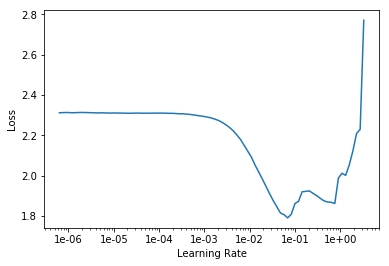

In [74]:
learn.lr_find()
learn.recorder.plot()

And you can say **fit_one_cycle** instead of just **fit**. These things really help a lot like.

In [75]:
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.150406,0.133186,0.961300,00:03


By using the learning rate finder, I found a good learning rate. Then like look at this, my loss here 0.13. Here I wasn't getting much beneath 0.5:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/49.png?raw=True)

So these tweeks make huge differences; not tiny differences. And this is still just one one epoch.



##Fit one cycle [2:00:02](https://youtu.be/uQtTwhpv7Ew?t=7202)

Now what does fit one cycle do? What does it really do? This is what it really does:

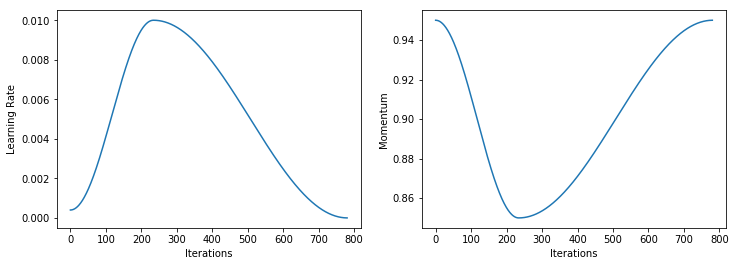

In [76]:
learn.recorder.plot_lr(show_moms=True)

We've seen this chart on the left before. Just to remind you, this is plotting the learning rate per batch. Remember, Adam has a learning rate and we use Adam by default (or minor variation which we might try to talk about). So the learning rate starts really low and it increases about half the time, and then it decreases about half the time. Because at the very start, we don't know where we are. So we're in some part of function space, it's just bumpy as all heck. So if you start jumping around, those bumps have big gradients and it will throw you into crazy parts of the space. So start slow. Then you'll gradually move into parts of the weight space that is sensible. And as you get to the points where they're sensible, you can increase the learning rate because the gradients are actually in the direction you want to go. Then as we've discussed a few times, as you get close to the final answer you need to anneal your learning rate to hone in on it.

But here's the interesting thing - on the right is the momentum plot. Every time our learning rate is small, our momentum is high. Why is that? Because I do have a learning small learning rate, but you keep going in the same direction, you may as well go faster. But if you're jumping really far, don't like jump really far because it's going to throw you off. Then as you get to the end again, you're fine tuning in but actually if you keep going the same direction again and again, go faster. So this combination is called one cycle and it's a simple thing but it's astonishing. This can help you get what's called super convergence that can let you train 10 times faster.

This was just last year's paper. Some of you may have seen the [interview with Leslie Smith](https://youtu.be/dxpyg3mP_rU) that I did last week. An amazing guy, incredibly humble and also I should say somebody who is doing groundbreaking research well into his 60's and all of these things are inspiring.

I'll show you something else interesting. When you plot the losses with fastai, it doesn't look like that:

![](https://github.com/hiromis/notes/raw/master/lesson5/50.png?raw=true)

It looks like that :



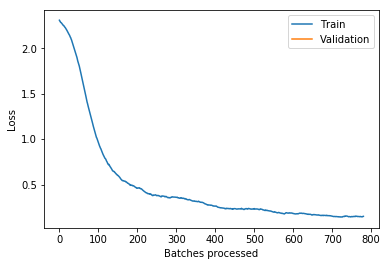

In [77]:
learn.recorder.plot_losses()

Why is that? Because fastai calculates the exponentially weighted moving average of the losses for you. So this concept of exponentially weighted stuff, it's just really handy and I use it all the time. And one of the things that is to make it easier to read these charts. It does mean that these charts from fastai might be a batch or two behind where they should be. There's that slight downside when you use an exponentially weighted moving average is you've got a little bit of history in there as well. But it can make it much easier to see what's going on.

## Cross Entropy Loss 

**Back to Tabular** [2:03:15](https://youtu.be/uQtTwhpv7Ew?t=7395)

We're now at a point coming to the end of this collab and tabular section where we're going to try to understand all of the code in our tabular model. Remember, the tabular model use this data set called adult which is trying to predict who's going to make more money. It's a classification problem and we've got a number of categorical variables and a number of continuous variables.



In [0]:
from fastai.tabular import *

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
dep_var = '>=50k'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

**The first thing we realize is we actually don't know how to predict a categorical variable yet**. Because so far, we did some hand waving around the fact that our loss function was **nn.CrossEntropyLoss**. What is that? Let's find out. And of course we're going to find out by looking at [Microsoft Excel](https://github.com/fastai/course-v3/blob/master/files/xl/entropy_example.xlsx).

**Cross-entropy loss is just another loss function**. You already know one loss function which is mean squared error $(\hat{y}-y)^{2}$. That's not a good loss function for us because in our case we have, for MNIST, 10 possible digits and we have 10 activations each with a probability of that digit. So we need something where predicting the right thing correctly and confidently should have very little loss; predicting the wrong thing confidently should have a lot of loss. So that's what we want.

Here's an example:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/51.png?raw=true)

Here is cat versus dog one hot encoded. Here are my two activations for each one from some model that I built - probability cat, probability dog. The first row is not very confident of anything. The second row is very confident of being a cat and that's right. The third row is very confident for being a cat and it's wrong. So we want a loss that for the first row should be a moderate loss because not predicting anything confidently is not really what we want, so here's 0.3. The second row is predicting the correct thing very confidently, so 0.01. The third row is predicting the wrong thing very confidently, so 1.0.

How do we do that? This is the cross entropy loss:

![alt text](https://github.com/hiromis/notes/blob/master/lesson5/52.png?raw=true)

It is equal to whether it's a cat multiplied by the log of the cat activation, negative that, minus is it a dog times the log of the dog activation. That's it. So in other words, it's the sum of all of your one hot encoded variables times all of your activations.

![](https://github.com/hiromis/notes/raw/master/lesson5/53.png?raw=true)

Interestingly these ones here (column G) - exactly the same numbers as the column F, but I've written it differently. I've written it with an if function because the zeros don't actually add anything so actually it's exactly the same as saying if it's a cat, then take the log of cattiness and if it's a dog (i.e. otherwise) take the log of one minus cattiness (in other words, the log of dogginess). So the sum of the one hot encoded times the activations is the same as an **if function**. If you think about it, because this is just a matrix multiply, it is the same as an index lookup (as we now know from our from our embedding discussion). So to do cross entropy, you can also just look up the log of the activation for the correct answer.

Now that's only going to work if these rows add up to one. This is one reason that you can get screwy cross-entropy numbers is (that's why I said you press the wrong button) if they don't add up to 1 you've got a trouble. So how do you make sure that they add up to 1? You make sure they add up to 1 by using the correct activation function in your last layer. And the correct activation function to use for this is **softmax**. Softmax is an activation function where:

- all of the activations add up to 1
- all of the activations are greater than 0
- all of the activations are less than 1

So that's what we want. That's what we need. How do you do that? Let's say we were predicting one of five things: cat, dog, plane, fish, building, and these were the numbers that came out of our neural net for one set of predictions (**output**).

What if I did **e** to the power of that? That's one step in the right direction because e to the power of something is always bigger than zero so there's a bunch of numbers that are always bigger than zero. Here's the sum of those numbers (12.14). Here is **e** to the number divided by the sum of **e** to the number:

![](https://github.com/hiromis/notes/blob/master/lesson5/54.png?raw=true)

Now this number is always less than one because all of the things were positive so you can't possibly have one of the pieces be bigger than 100% of its sum. And all of those things must add up to 1 because each one of them was just that percentage of the total. That's it. So this thing **softmax** is equal to e to the activation divided by the sum of e to the activations. That's called softmax.

So when we're doing single label multi-class classification, you generally want softmax as your activation function and you generally want cross-entropy as your loss. Because these things go together in such friendly ways, PyTorch will do them both for you. So you might have noticed that in this MNIST example, I never added a softmax here:

![](https://github.com/hiromis/notes/raw/master/lesson5/55.png?raw=true)

That's because if you ask for cross entropy loss (**nn.CrossEntropyLoss**), it actually does the softmax inside the loss function. So it's not really just cross entropy loss, it's actually softmax then cross entropy loss.

So you've probably noticed this, but sometimes your predictions from your models will come out looking more like this:

![](https://github.com/hiromis/notes/blob/master/lesson5/56.png?raw=true)

Pretty big numbers with negatives in, rather than this (softmax column) - numbers between 0 to 1 that add up to 1. The reason would be that it's a PyTorch model that doesn't have a softmax in because we're using cross entropy loss and so you might have to do the softmax for it.

Fastai is getting increasingly good at knowing when this is happening. Generally if you're using a loss function that we recognize, when you get the predictions, we will try to add the softmax in there for you. But particularly if you're using a custom loss function that might call **nn.CrossEntropyLoss** behind the scenes or something like that, you might find yourself with this situation.



We only have 3 minutes less, but I'm going to point something out to you. Next week when we finish off tabular which we'll do in like the first 10 minutes, this is forward in tabular:

![](https://github.com/hiromis/notes/blob/master/lesson5/57.png?raw=true)

It basically goes through a bunch of embeddings. It's going to call each one of those embeddings **e** and you can use it like a function, of course. So it's going to pass each categorical variable to each embedding, it's going to concatenate them together into a single matrix. It's going to then call a bunch of layers which are basically a bunch of linear layers. And then it's going to do our sigmoid trick. There's only two new things we'll need to learn. One is dropout and the other is batch norm (**bn_cont**). These are two additional regularization strategies. **BatchNorm does more than just regularization, but amongst other things it does regularization**. And the basic ways you regularize your model are weight decay, batch norm, and dropout. **Then you can also avoid overfitting using something called data augmentation**. So batch norm and dropout, we're going to touch on at the start of next week. And we're also going to look at data augmentation and then we're also going to look at what convolutions are. And we're going to learn some new computer vision architectures and some new computer vision applications. But basically we're very nearly there. You already know how the entirety of **collab.py** (**fastai.collab**) works. You know why it's there and what it does and you're very close to knowing what the entirety of tabular model does. And this tabular model is actually the one that, if you run it on Rossmann, you'll get the same answer that I showed you in that paper. You'll get that second place result. In fact, even a little bit better. I'll show you next week (if I remember) how I actually ran some additional experiments where I figured out some minor tweaks that can do even slightly better than that. We'll see you next week. Thanks very much and enjoy the smoke outside.